# Modulo 4

## Transformers

In [3]:
import numpy as np
import torch
from scipy.special import softmax
import seaborn as sns
import matplotlib.pyplot as plt
# Instalação necessária no Colab: !pip install sentence-transformers
print("Ambiente GenAI configurado.")

Ambiente GenAI configurado.


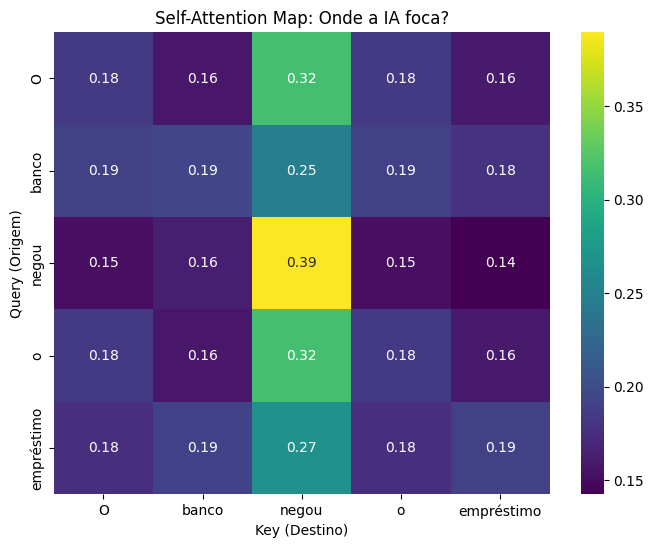

Output da Camada de Atenção (Contextualizado):
 [[0.23328198 0.83511485 0.62174899 0.90053105]
 [0.22424578 0.78399596 0.64104685 0.83888332]
 [0.25483896 0.85011489 0.58509514 0.9488879 ]
 [0.23328198 0.83511485 0.62174899 0.90053105]
 [0.23173942 0.78735435 0.62267583 0.84862524]]


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import softmax

# 1. Simulação de Embeddings (Representação Numérica das Palavras)
# Frase: "O banco negou o empréstimo"
# Dimensão do Embedding (d_model) = 4 (simplificado para visualização)
words = ["O", "banco", "negou", "o", "empréstimo"]
embeddings = np.array([
    [1, 0, 0, 0],  # O
    [0, 1, 0, 0],  # banco
    [0, 0, 1, 1],  # negou
    [1, 0, 0, 0],  # o
    [0, 0, 0, 1]   # empréstimo
])

# 2. Criação das Matrizes de Pesos (Q, K, V) - Inicializadas aleatoriamente
np.random.seed(42)
d_k = 4
W_q = np.random.rand(4, d_k)
W_k = np.random.rand(4, d_k)
W_v = np.random.rand(4, d_k)

# 3. Projeção Linear (Query, Key, Value)
Q = np.dot(embeddings, W_q) # O que eu procuro?
K = np.dot(embeddings, W_k) # O que eu ofereço?
V = np.dot(embeddings, W_v) # Qual meu conteúdo?

# 4. Cálculo dos Scores de Atenção (Produto Escalar)
# "Quem deve prestar atenção em quem?"
scores = np.dot(Q, K.T) / np.sqrt(d_k)

# 5. Aplicação do Softmax (Transformar em Probabilidade)
attention_weights = softmax(scores, axis=1)

# 6. Visualização da Matriz de Atenção
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, xticklabels=words, yticklabels=words, cmap="viridis", annot=True)
plt.title("Self-Attention Map: Onde a IA foca?")
plt.xlabel("Key (Destino)")
plt.ylabel("Query (Origem)")
plt.show()

# O Resultado Final (Contexto Agregado)
z = np.dot(attention_weights, V)
print("Output da Camada de Atenção (Contextualizado):\n", z)

In [9]:
from sentence_transformers import SentenceTransformer, util
import torch

# 1. Carregar Modelo de Embedding (Mini-LLM para transformar texto em vetor)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Base de Conhecimento "Privada" (Contexto que a IA não saberia nativamente)
corpus = [
    "A Fatec Franca foi fundada em 2009 como referência.",
    "O Professor Leonardo leciona a disciplina de IA.",
    "A nota mínima para aprovação no curso é 6.0.",
    "O laboratório de IA fica no Lab 3."
]

# 3. Vetorização do Banco de Dados (Indexação)
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# 4. Simulação do Usuário (Query)
query = "Qual é a nota para passar na matéria?"
print(f"Pergunta do Usuário: '{query}'")

# 5. RETRIEVAL (A Busca Semântica)
# Transformamos a pergunta em vetor e comparamos com o banco
query_embedding = embedder.encode(query, convert_to_tensor=True)
cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]

# Encontrar o trecho mais relevante (Top-1)
best_match_idx = torch.argmax(cos_scores).item()
best_score = cos_scores[best_match_idx].item()
retrieved_context = corpus[best_match_idx]

print("\n--- Sistema RAG ---")
print(f"🔍 Trecho Recuperado (Score: {best_score:.4f}):")
print(f"📄 '{retrieved_context}'")

# 6. GENERATION (Simulação do Prompt para a LLM)
prompt_final = f"""
Use o contexto abaixo para responder a pergunta. Se não souber, diga que não sabe.

Contexto: {retrieved_context}
Pergunta: {query}

Resposta:"""

print("\n📝 Prompt montado para enviar à LLM (GPT/Llama):")
print(prompt_final)

Pergunta do Usuário: 'Qual é a nota para passar na matéria?'

--- Sistema RAG ---
🔍 Trecho Recuperado (Score: 0.5071):
📄 'A nota mínima para aprovação no curso é 6.0.'

📝 Prompt montado para enviar à LLM (GPT/Llama):

Use o contexto abaixo para responder a pergunta. Se não souber, diga que não sabe.

Contexto: A nota mínima para aprovação no curso é 6.0.
Pergunta: Qual é a nota para passar na matéria?

Resposta:
